# Please scroll down to "Second semseter" (near the end)

### Data Science Project: Joshua Gordon

## remarks:
#### This is a new notebook where i have copied important parts from my project from the first semester.

# please feel free to scroll down to: "Second semester" there i have stated a small recap of the privoisue project and applied new learning capabilitys to improve my models accuracy as well as use less features.

# First Semester
# ..............................................................................................................
# ..............................................................................................................
# ..............................................................................................................

# Contents:
* classification model
* * KNN model to predict a given year between 2015 - 2019 based on nine features
* * In this project we merged 5 data sets and added the year the survay was taken in
* * another "sexier" modlel using only strongly correlated featrues

* * Logistic regression model

* regression model
* * predicting the writing score on a test

## part one: Classification model

##### goals:
* ***importing and anaylizing data, understanding what we are working with***
* ***data cleaning***
* ***spliting the data to test and train sets***
* ***maximizing our models accuracy***

#### *importing and anaylizing data, understanding what we are working with*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_2019 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2019.csv')

df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## We have managed to import our dataset of world happines report 2019

#### After importing our data I have stummbled across another 4 data sets from previose years (2015 - 2018).
#### We shall import all these five data sets and proceed to clean the data one data set at a time in order to hopfully merge all the data sets

In [2]:
df_2019['year'] = 2019

cols_lst = ['Overall rank', 'Country or region', 'Score', 'GDP per capita','Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'year']

df_2019.columns = cols_lst

df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


#### *We shall add a column for each dataset with the year the data was recorded. we shall then try build a classifiction modle* 
#### *that will correctly prredict the year of a given data sample.*

#### *An imortant part of the data cleaning prossess is to make sure all 5 datasets have the same headings we there for shall drop heading that are unique and keep only the headings and data that all 5 data sets share.

In [3]:
df_2018 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2018.csv')
df_2018['year'] = 2018

df_2018.columns = cols_lst

df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [4]:
df_2017 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2017.csv')


df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


#### *We can clearly see here that we have irrelivant data that is not shared with our previouse data sets. we shall there for drop them as they are irrelivant for our task at hand*

In [5]:
df_2017['year'] = 2017
df_2017.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], axis=1, inplace=True)

temp_lst = list(df_2017)


col_Titles=["Happiness.Rank","Country"] + temp_lst[2:]


df_2017=df_2017.reindex(columns=col_Titles)

df_2017.columns = cols_lst

df_2017.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017


In [6]:
df_2016 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2016.csv')

df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


#### *We can clearly see here that we have irrelivant data that is not shared with our previouse data sets. we shall there for drop them as they are irrelivant for oour task at hand*

In [7]:
df_2016['year'] = 2016
df_2016.drop(['Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual','Region'] ,axis = 1,inplace=True)

temp_lst = list(df_2016)

col_Titles = ["Happiness Rank","Country"] + temp_lst[2:]

df_2016 = df_2016.reindex(columns=col_Titles)
df_2016.columns = cols_lst

df_2016.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,2,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,3,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,4,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,5,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016


In [8]:
df_2015 = pd.read_csv(r'C:\Users\Joshua Student\Downloads\archive (1)\2015.csv')

df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### *We can clearly see here that we have irrelivant data that is not shared with our previouse data sets. we shall there for drop them as they are irrelivant for oour task at hand*

In [9]:
df_2015['year'] = 2015
lst = list(df_2015)
df_2015.drop([lst[1], lst[4], lst[-2]], axis = 1, inplace=True)

lst = list(df_2015)
col_Titles = ["Happiness Rank", "Country"] + lst[2:]

df_2015 = df_2015.reindex(columns=col_Titles)
df_2015.columns = cols_lst

df_2015.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


## data cleaning

#### *We have successfuly manged to import and clean our 5 data sets in order to merge the data sets in to one big data frame*

In [10]:
all_years_data = [df_2019, df_2018, df_2017, df_2016, df_2015]

df = pd.concat(all_years_data)

df.head(1000)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.769,1.34000,1.58700,0.98600,0.59600,0.15300,0.39300,2019
1,2,Denmark,7.600,1.38300,1.57300,0.99600,0.59200,0.25200,0.41000,2019
2,3,Norway,7.554,1.48800,1.58200,1.02800,0.60300,0.27100,0.34100,2019
3,4,Iceland,7.494,1.38000,1.62400,1.02600,0.59100,0.35400,0.11800,2019
4,5,Netherlands,7.488,1.39600,1.52200,0.99900,0.55700,0.32200,0.29800,2019
...,...,...,...,...,...,...,...,...,...,...
153,154,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,2015
154,155,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,2015
155,156,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,2015
156,157,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,2015


In [11]:
df.shape

(782, 10)

## ***Above we have used the shape function and can conclude that we have 10 features ad 782 rows of data***

# Lets make sure we understand all our features:
### overall rank: the rank of that year out of all the countrys
### country of region: the country that was ranked
### score: the overall score 
### GDP per capita: Gross domestic product final good and services produced value
### socail support: the score for social support
### healthy life expectancy: the score for life expectancy 
### freedom of choices: the score for freedom
### generosity: the score on the survay for generosity
### Perceptions of corruption: score for perceptions of corruption
### year: the year the surrvay was done in

# Over all we have ten features and 782 rows of data

In [12]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.178526,0.165536,2016.993606
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.119115,0.127410,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.084860,0.067860,2016.000000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.155219,0.128000,2017.000000
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.246864,0.236930,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.819710,2019.000000


#### *We have merged the data and got a quick description of our new 5 in 1 data set*

In [13]:
df.isnull().sum()
#checking to see which values are null

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
year                            0
dtype: int64

#### Checking for null values as this could mess around later on when we try and make a modle

In [14]:
df['Perceptions of corruption'] = df['Perceptions of corruption'].fillna(0)

In [15]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
year                            0
dtype: int64

#### Fixing the null values and double checking see have corrected the data


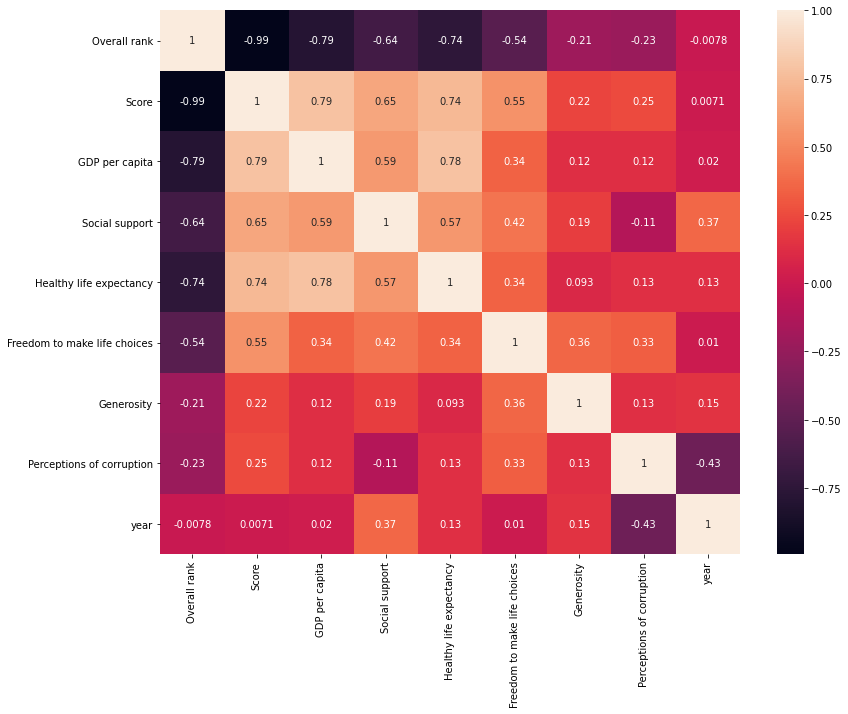

In [16]:
import seaborn as sns

plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot = True);

In [17]:
df.corr()['year']

Overall rank                   -0.007768
Score                           0.007065
GDP per capita                  0.019768
Social support                  0.367431
Healthy life expectancy         0.130302
Freedom to make life choices    0.010353
Generosity                      0.150721
Perceptions of corruption      -0.427954
year                            1.000000
Name: year, dtype: float64

# Important Analiysis

* ***Let us notic that our countrys have not shown up in the correlation graph as they are objects of the type String and we would need to manually make them in to numric values***

### ***most importantly we shall notice that there is a weak correlation between the feature year and the other features. We can there for expect for our modle to have a lower accuracy score than if the features were highly correlated***

# spliting the data to test and train sets

In [18]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['year']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)


score = classifier.score(X_test, y_test)
print(score)

0.10191082802547771


In [19]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')

dummy_clf.score(X, y)

0.2020460358056266

In [20]:
df['Country or region'] = df['Country or region'].str.title()

countrys = list(df['Country or region'].unique())

In [21]:
nums = list(range(1,len(countrys)+1))


dic = dict(zip(countrys, nums))

### ***let us try improve our modle by adding the countrys, above we have made two lists: one of countrys and the other of numbers 1 - 169 representing all the countrys. we have merged them in to a dictinary and will add the new values to our dataset***

In [22]:
df['Country of region to num'] = df['Country or region'].map(dic)
df.head(1000)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Country of region to num
0,1,Finland,7.769,1.34000,1.58700,0.98600,0.59600,0.15300,0.39300,2019,1
1,2,Denmark,7.600,1.38300,1.57300,0.99600,0.59200,0.25200,0.41000,2019,2
2,3,Norway,7.554,1.48800,1.58200,1.02800,0.60300,0.27100,0.34100,2019,3
3,4,Iceland,7.494,1.38000,1.62400,1.02600,0.59100,0.35400,0.11800,2019,4
4,5,Netherlands,7.488,1.39600,1.52200,0.99900,0.55700,0.32200,0.29800,2019,5
...,...,...,...,...,...,...,...,...,...,...,...
153,154,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,2015,152
154,155,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,2015,102
155,156,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,2015,149
156,157,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,2015,145


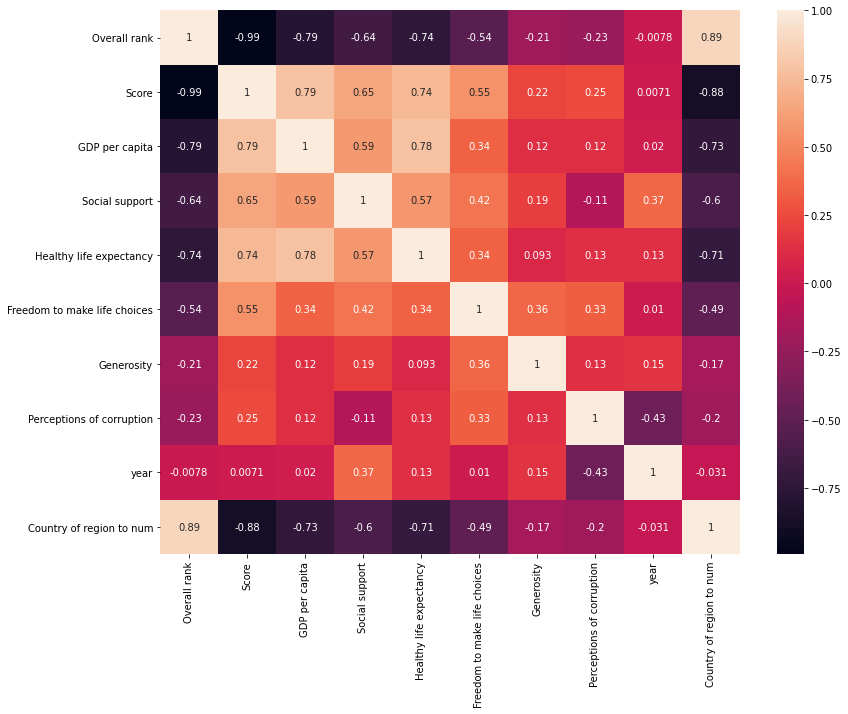

In [23]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot = True);

In [24]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption','Country of region to num']]
y = df['year']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)
print(score)


0.2356687898089172


###  ***Below we are going to do a K cross validation*** 

#### This will help us make sure our model is reliable

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=folds)
scores.mean()

0.2304

In [26]:
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=folds)
scores 

array([0.224, 0.184, 0.216, 0.224, 0.304])

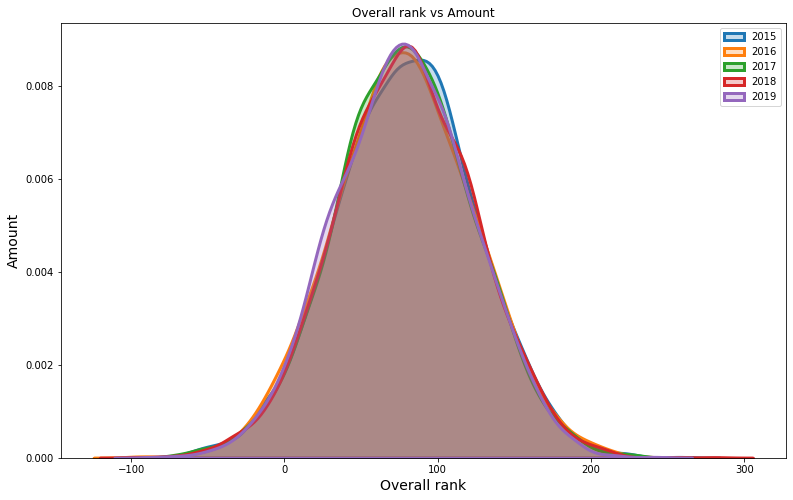

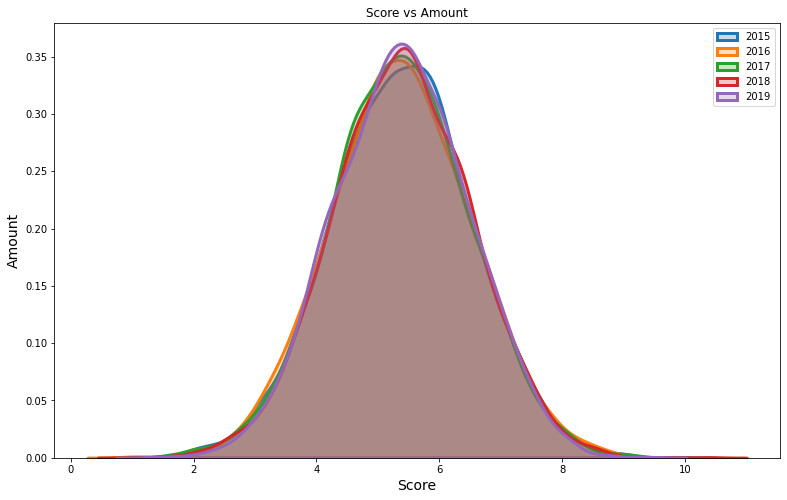

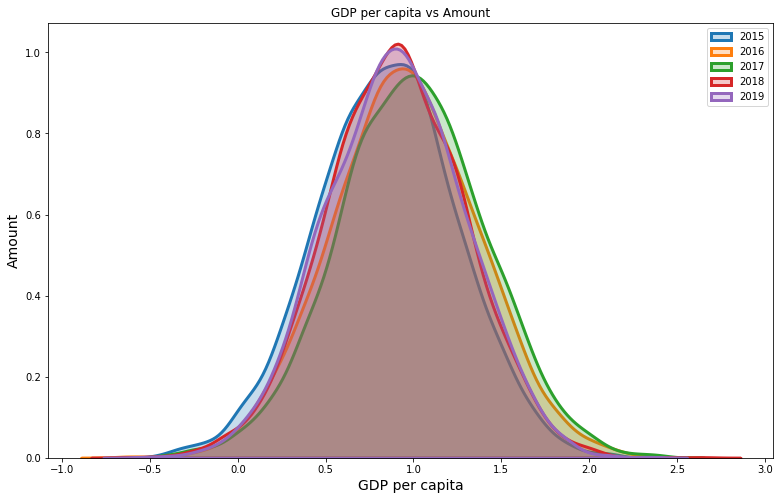

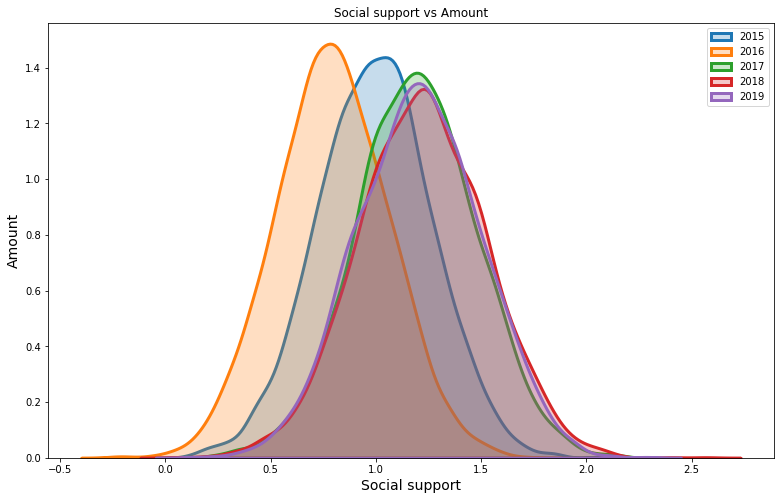

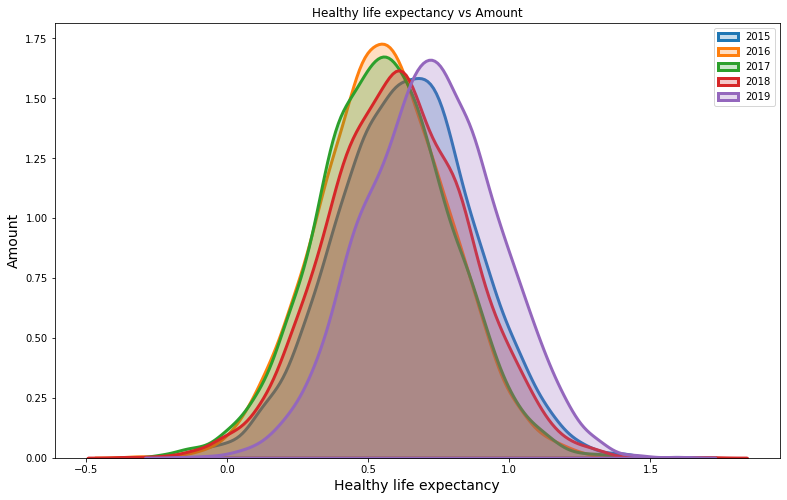

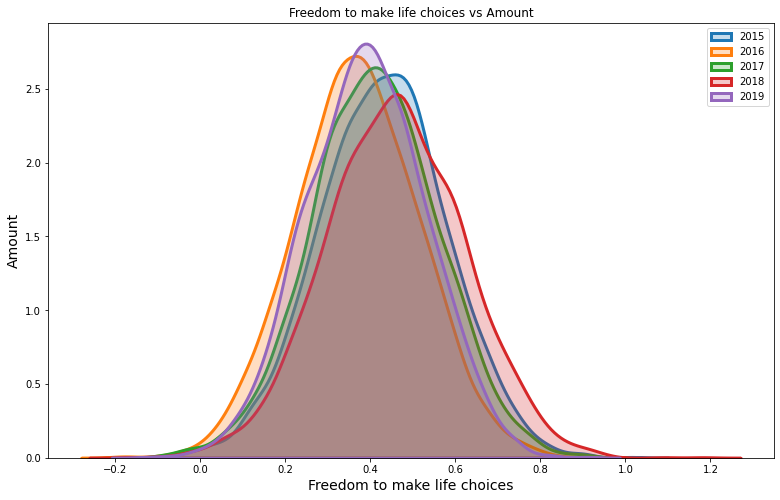

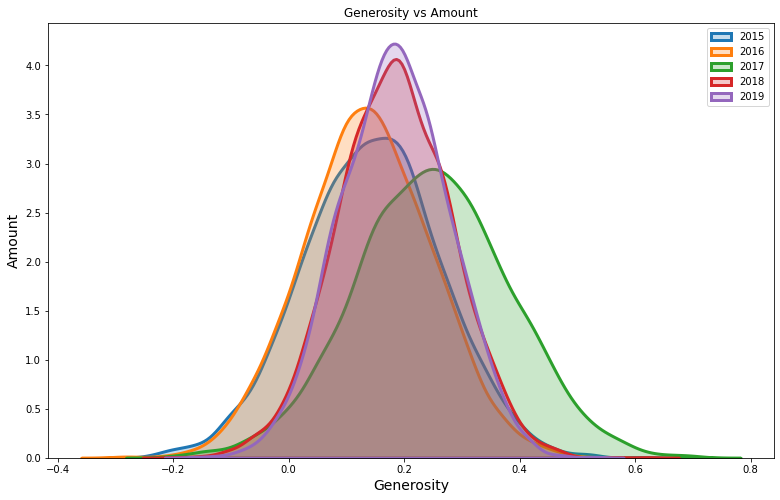

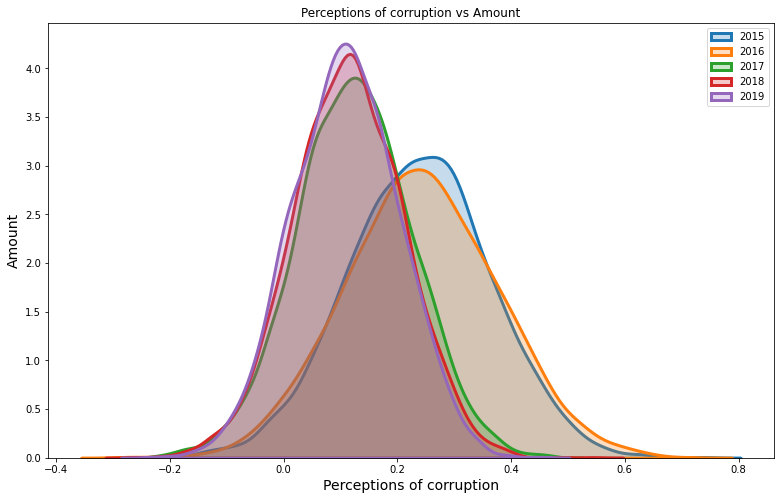

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def histogram(lst_features):
    for f in lst_features:

        # set seed for reproducing
        np.random.seed(42)
        n = 5000

        #2015
        mean_2015 = df_2015[f].mean()
        sd_2015 = df_2015[f].std()
        hist_2015 = np.random.normal(mean_2015, sd_2015, n)

        #2016
        mean_2016 = df_2016[f].mean()
        sd_2016 = df_2016[f].std()
        hist_2016 = np.random.normal(mean_2016, sd_2016, n)

        #2017
        mean_2017 = df_2017[f].mean()
        sd_2017 = df_2017[f].std()
        hist_2017 = np.random.normal(mean_2017, sd_2017, n)

        #2018
        mean_2018 = df_2018[f].mean()
        sd_2018 = df_2018[f].std()
        hist_2018 = np.random.normal(mean_2018, sd_2018, n)

        #2019
        mean_2019 = df_2019[f].mean()
        sd_2019 = df_2019[f].std()
        hist_2019 = np.random.normal(mean_2019, sd_2019, n)

        plt.figure(figsize=(13,8))
        sns.distplot(hist_2015, hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3}, label = "2015")
        sns.distplot(hist_2016, hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3}, label = "2016")
        sns.distplot(hist_2017, hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3}, label = "2017")
        sns.distplot(hist_2018, hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3}, label = "2018")
        sns.distplot(hist_2019, hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3}, label = "2019")


        plt.xlabel(f, size=14)
        plt.ylabel("Amount", size=14)
        plt.title(f + " vs Amount")
        plt.legend(loc='upper right')


        
        

        
lst_fs = list(df)
lst_fs.remove('Country or region')
lst_fs.remove('Country of region to num')
lst_fs.remove('year')

histogram(lst_fs)

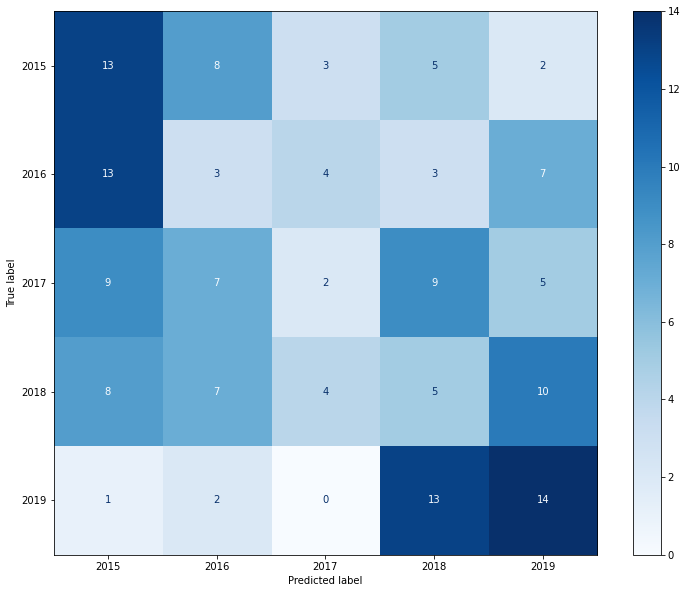

In [28]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(13, 10))
plot_confusion_matrix(classifier, X_test, y_test, ax=ax,cmap=plt.cm.Blues)


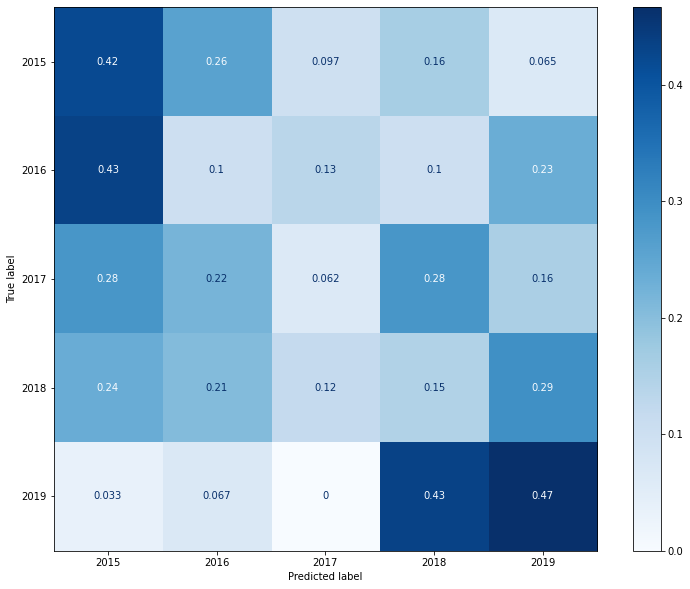

In [29]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(13, 10))
plot_confusion_matrix(classifier, X_test, y_test, ax=ax,cmap=plt.cm.Blues,normalize='true')


## ***Above we can see that social support, generosity ,Healthy life expectancy and perceptions of curruption is highly correlated with the year, therefor lets try run a quick modle with ONLY these four features***

## meaning our *new* model will recive instead of all nine other features it will recive only these four features and predict the year the survay was taken in

In [30]:
X = df[['Social support', 'Perceptions of corruption','Generosity','Healthy life expectancy']]
y = df['year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)

print(score)

0.45222929936305734


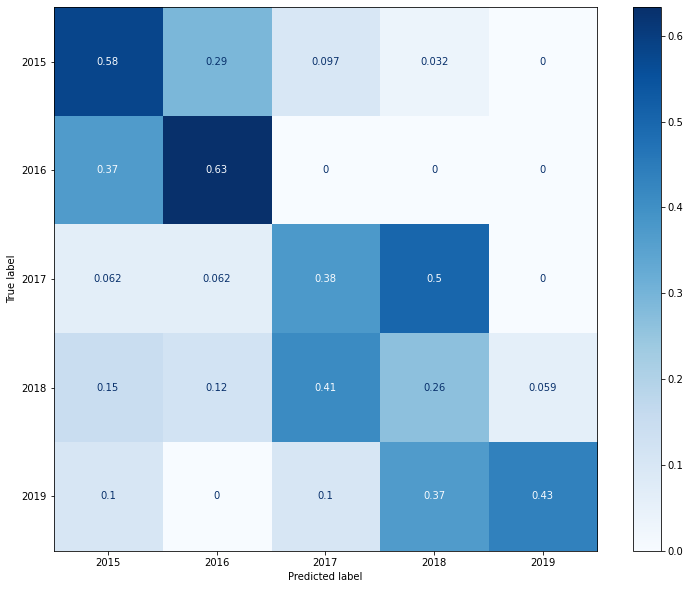

In [31]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(13, 10))
plot_confusion_matrix(classifier, X_test, y_test, ax=ax,cmap=plt.cm.Blues,normalize='true')


# ROC

## Doing a ROC graph and analyis with multipe classes such as years (2015-2019) is abit complicated therefor below we will make a new model that predicts a "good" GDP score

## below we shal define a good GPD score as a score above the average GDP

## we shall create our modle , split the data, find the best test size as well as the best KKN value. we shall than show the confusion matrix as well as the ROC curve

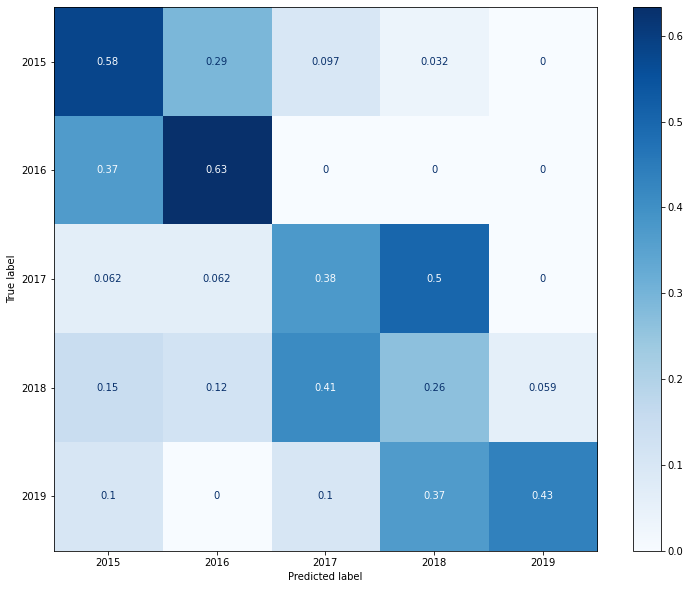

In [32]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(13, 10))
plot_confusion_matrix(classifier, X_test, y_test, ax=ax,cmap=plt.cm.Blues,normalize='true')


In [33]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Country of region to num
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,1
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,2
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,3
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,4
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,5


In [34]:
mean = df['GDP per capita'].mean()

In [35]:
df['GDP per capita'] = np.where((df['GDP per capita'] >= mean),1,df['GDP per capita'])
df['GDP per capita'] = np.where((df['GDP per capita'] < mean),0,df['GDP per capita'])
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Country of region to num
0,1,Finland,7.769,1.0,1.587,0.986,0.596,0.153,0.393,2019,1
1,2,Denmark,7.600,1.0,1.573,0.996,0.592,0.252,0.410,2019,2
2,3,Norway,7.554,1.0,1.582,1.028,0.603,0.271,0.341,2019,3
3,4,Iceland,7.494,1.0,1.624,1.026,0.591,0.354,0.118,2019,4
4,5,Netherlands,7.488,1.0,1.522,0.999,0.557,0.322,0.298,2019,5


In [36]:
X = df[['Healthy life expectancy']]
y = df['GDP per capita']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)

print(score)

0.7961783439490446


In [37]:
X = df[['Healthy life expectancy']]
y = df['GDP per capita']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)

print(score)

0.875


In [38]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')

dummy_clf.score(X, y)

0.5524296675191815

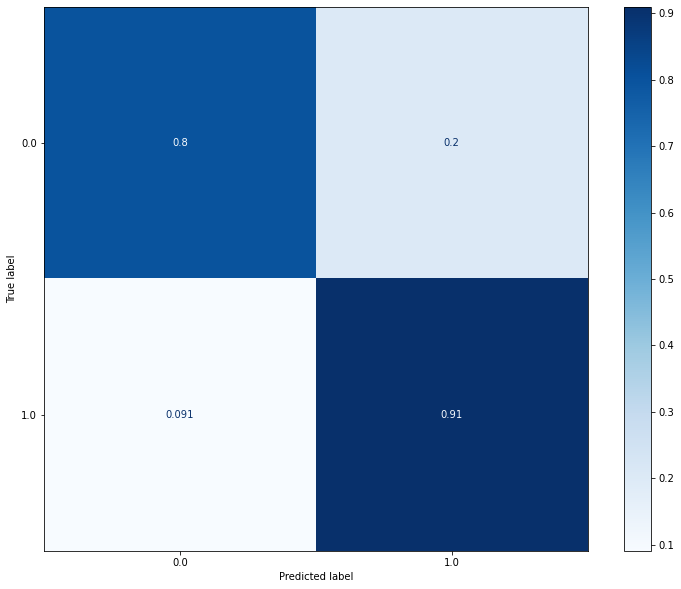

In [39]:
fig, ax = plt.subplots(figsize=(13, 10))
plot_confusion_matrix(classifier, X_test, y_test, ax=ax,cmap=plt.cm.Blues,normalize='true')

roc_auc_score for KNN:  0.9181818181818182


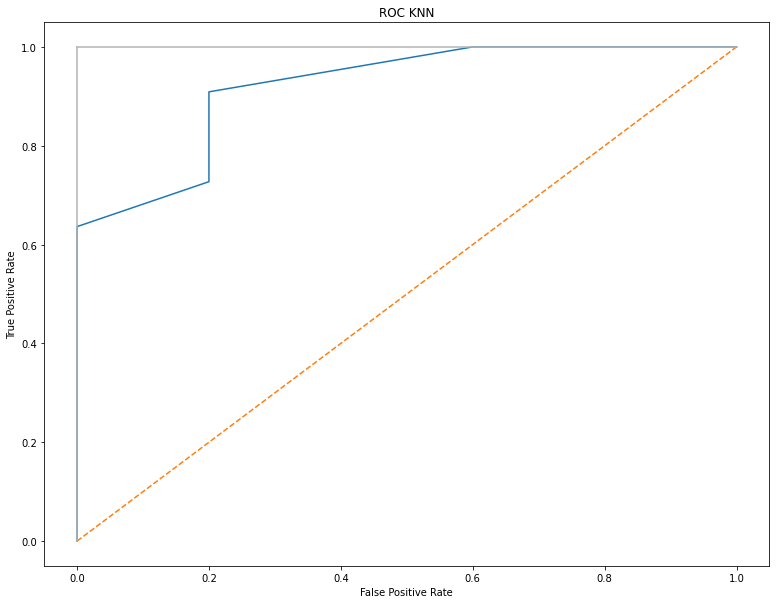

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score1 = classifier.predict_proba(X_test)[:,1]

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score1)

print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score1))

fig, ax = plt.subplots(figsize=(13, 10))
plt.title('ROC KNN')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# .............................................................................................

# Second Semeter

# .................................................................................................
# .................................................................................................
# .................................................................................................

### Important recap:

### last semester i did built a multi-class classification model that predicts what year a survay was taken in based on multiple features.

### I did this by combining 5 survays taken in the years [2015 - 2019] and combining them in to one dataset and adding a 'year' column as well as deleting any data that not all 5 survays had in common.

## List of features used:
### overall rank: the rank of that year out of all the countrys
### country of region: the country that was ranked
### score: the overall score 
### GDP per capita: Gross domestic product final good and services produced value
### socail support: the score for social support
### healthy life expectancy: the score for life expectancy 
### freedom of choices: the score for freedom
### generosity: the score on the survay for generosity
### Perceptions of corruption: score for perceptions of corruption
### year: the year the surrvay was done in


### I then chose correlated features and ended up building a multiclass classification model using four features:
### socail support , Perceptions of corruption, generosity, healthy life expectancy

### my model had an accuracy rate of around 45% and i explained this by the fact that from year to year not much changes and we expected from the begining for a low accuracy score. However it is still considered good as it beats our 'dummy model' with an accuracy of 19.7%

# Below are my improvments based on what i have learned this semester:


In [41]:
import warnings
warnings.filterwarnings('ignore')

### Model from last semester:

In [42]:
X = df[['Social support', 'Perceptions of corruption','Generosity','Healthy life expectancy']]
y = df['year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)

print(score)

0.45222929936305734


In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=folds)
scores.mean()

0.47519999999999996

#### varifying that my model is above the dummy classifier benchmark

In [44]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='most_frequent')

dummy_clf.score(X_test, y_test)

0.19745222929936307

## Using a new model ensemble model XGboost:
### this model ......

In [45]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

[17:49:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.4394904458598726

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=folds)
scores.mean()

[17:49:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:49:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:49:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:49:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.49119999999999997

### We can see this model has out performed our previuse model but we shall improve it even more.

In [47]:
# 

In [48]:
#df.head()

In [49]:
#df.drop(['Overall rank', 'Country or region', 'GDP per capita', 'Freedom to make life choices','Country of region to num', 'Score'], axis=1, inplace=True)

In [50]:
#df.head()

In [51]:
#df_features = df.iloc[:, :-1]
#df_labels = df.iloc[:, 4:5]
#df_features

In [52]:
#df_labels

# Below we are going to normalize our data with standard sclaer as well as peform PCA to reduce our dimentions.

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

df_norm

,Social support,Perceptions of corruption,Generosity,Healthy life expectancy
0,0.965328,0.479438,0.182561,0.864154
1,0.956813,0.500177,0.300689,0.872918
2,0.962287,0.416001,0.323360,0.900964
3,0.987835,0.143953,0.422396,0.899211
4,0.925791,0.363543,0.384214,0.875548
...,...,...,...,...
777,0.470620,0.276049,0.658545,0.375670
778,0.215243,0.222762,0.095576,0.279667
779,0.288863,0.575557,0.225588,0.632717
780,0.252962,0.240658,0.120061,0.196284


In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca.fit(df_norm)
reduced = pd.DataFrame(pca.transform(df_norm))

percent_of_varaints_to_n = reduced.shape[1]
percent_of_varaints_to_n

3

# reducign to 3 dimentions

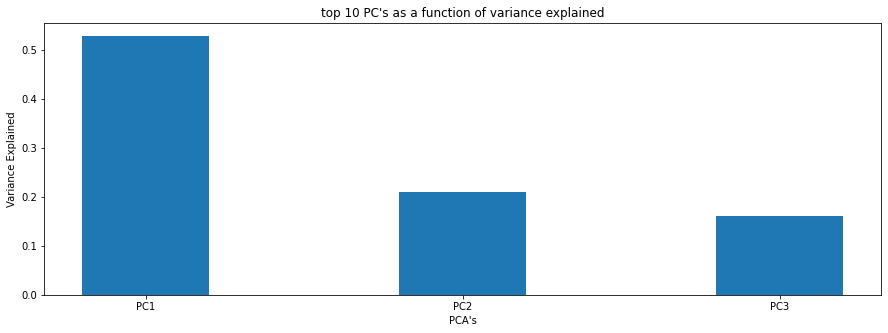

In [55]:
x_axis = pca.explained_variance_ratio_
x_ = x_axis.tolist()[:3]
lst = []
for i in range(1,4):
    lst.append('PC'+ str(i) )
fig = plt.figure(figsize = (15, 5))
plt.bar(lst, x_,width = 0.4 )
plt.xlabel("PCA's")
plt.ylabel("Variance Explained")
plt.title("top 10 PC's as a function of variance explained")
plt.show()

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(df_norm)
reduced = pd.DataFrame(pca.transform(df_norm))

percent_of_varaints_to_n = reduced.shape[1]
percent_of_varaints_to_n

2

# reducing to 2 dimentions:

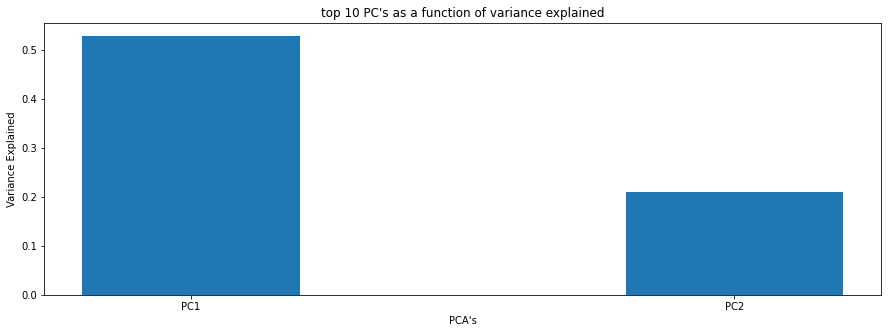

In [57]:
x_axis = pca.explained_variance_ratio_
x_ = x_axis.tolist()[:2]
lst = []
for i in range(1,3):
    lst.append('PC'+ str(i) )
fig = plt.figure(figsize = (15, 5))
plt.bar(lst, x_,width = 0.4 )
plt.xlabel("PCA's")
plt.ylabel("Variance Explained")
plt.title("top 10 PC's as a function of variance explained")
plt.show()

## Our previose modle from last semester got a 45% accracy rate while using 4 features. By using PCA our model can get a close 42% accuracy rate while using only 2 features

In [59]:
X = reduced
y = df['year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)

print(score)

0.4267515923566879


## Our new model can get a nearly perfect 52% accuracy with two features as it did with 4 features

In [62]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

[17:49:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5222929936305732

# Conclusion:

## by using a better model XGboost we have improved our accuracy score from 45% to 52% while also reducing our dimentions from 4 to 2. double win!